## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importation des données

In [2]:
erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

## Vérification si une colonne est une clé primaire

In [3]:
# Fonction pour vérificier d'une clé primaire
def cle_primaire(df_cle,col): 
  table_length = len(df_cle) - len(df_cle.drop_duplicates(col))
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    

### 1-a) Nettoyage des donées

### Importation des données

In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
erp.shape

(825, 5)

In [6]:
erp['onsale_web'].value_counts()

1    717
0    108
Name: onsale_web, dtype: int64

### le fichier exports erp contient 825 lignes et 5 colonnes appellées "product_id", "onsale_web", "price", 
### stock_quantity" et "stock-status". 

In [7]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [8]:
web.shape

(1513, 28)

### Le fichier web contient 1513 lignes et 28 colonnes.

### Il a plus de lignes dans le fichier exports erp qui n' a que 825 lignes, il est donc probable que des lignes soient dupliquées.

### Il faudra éliminer des doublons du fichier web.

In [9]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [10]:
liaison.shape

(825, 2)

### Le fichier liaison contient 825 lignes et 2 colonnes appellées "product_id" et "id_web".

### Ces deux colonnes faisant la jonction pour chaque produit du "product_id" correspondant a "product_id" dans le fichier exports erp, et "id_web" correspondant a "sku" dans le fichier web.

In [11]:
# On compte les differentes types de valeurs contenues dans la colonne post_type du le fichier web  

web['post_type'].value_counts()

product       716
attachment    714
Name: post_type, dtype: int64

### Il y a 716 lignes concernant les product et 714 lignes concernant les attachment

In [12]:
df = web.sort_values(['sku','post_type'])
df.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1123,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
339,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1060,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
269,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
868,304,0,0,0,0.0,40.0,NaN,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### en observant la colonne post_type, on voit que les deux premiéres lignes correspondent au même sku. Une ligne correspond au produit quand l'autre correspond au attachment du produit sur le site.

### On peut donc éliminer les doublons en ne gardant qu'un seul type de ligne comme les lignes product.


In [13]:
# nettoyage des données web

# renommer les colonnes
web.rename(columns={"sku": "id_web","post_name" : "product_name"}, inplace=True)

# supprimer les colonnes non utilisables

web_data = web[["id_web","total_sales","product_name","post_type"]]

# conserver seulement les lignes product de la colonne post_type
web_data = web_data[web_data.post_type == 'product']

web_data.head()

,id_web,total_sales,product_name,post_type
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,product
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product
4,19814,3.0,pierre-jean-villa-igp-gamine-2018,product


In [14]:
web_data.shape

(716, 4)

In [15]:
# Vérification si colonne id-web est clé primaire
cle_primaire(web_data,['id_web'])

Pas une clé primaire ( 1 doublons )


In [16]:
recherche_null = web_data[web_data['id_web'].isnull()]
recherche_null.head()

,id_web,total_sales,product_name,post_type
470,NaN,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,product
471,NaN,0.0,pierre-jean-villa-condrieu-suspendu-2018,product


### La colonne id_web ne doit pas contenir des valeurs nulles, donc il faut supprimer ces derniéres.

In [17]:
web_data = web_data[web_data['id_web'].notnull()]
web_data.shape

(714, 4)

In [18]:
cle_primaire(web_data,['id_web'])

Clé primaire (0 doublon)


In [19]:
cle_primaire(erp,['product_id'])

Clé primaire (0 doublon)


In [37]:
erp_data = erp[erp['product_id'].notnull()]
erp_data.shape

(825, 5)

In [38]:
cle_primaire(erp,['product_id'])

Clé primaire (0 doublon)


In [20]:
# On fait une jointure entre le fichier web et le fichier de liaison
web_liaison = pd.merge(web_data, liaison, how="inner", on="id_web")

#jointure entre le fichier erp et la jointure du fichier web et liaison:
data_complet = pd.merge(erp, web_liaison,how="inner", on="product_id")

data_complet.shape

(714, 9)

## Calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

In [21]:
# Calculer chiffre d'affaire par produit
# Ajouter colonne chiffre_affaire
data_complet["chiffre_affaire"] = data_complet['price']*data_complet['total_sales']
data_complet.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,product_name,post_type,chiffre_affaire
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0


In [22]:
print(data_complet.groupby("product_id")[["chiffre_affaire"]].sum())

            chiffre_affaire
product_id                 
3847                  145.2
3849                    0.0
3850                    0.0
4032                   42.3
4039                    0.0
4040                    0.0
4041                    0.0
4042                  218.4
4043                  180.0
4045                  596.4
4046                  480.0
4047                    0.0
4048                  159.6
4049                   19.3
4050                  130.8
4051                   46.2
4052                  202.2
4053                 1018.9
4054                  716.0
4056                  127.0
4057                  156.6
4058                   95.7
4059                   60.9
4060                  107.1
4062                   35.7
4063                   43.5
4064                   43.2
4065                    0.0
4066                  416.0
4067                  418.0
...                     ...
6617                   59.4
6618                    0.0
6620                

In [36]:
# Calcul total du chiffre d'affaire réalisé en ligne
chiffre_affaire_tot = data_complet['chiffre_affaire'].sum()
print("Le chiffre d'affaire total est de :", chiffre_affaire_tot, "€")

Le chiffre d'affaire total est de : 70568.6 €


In [24]:
# Analyser les prix des produits 
data_complet["price"].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

###  Le résumé statistique  de la colonne price 

### On a 5,20 € pour le prix minimum et 225 € pour le prix maximum.
### On a les premier et troisème percentiles 
### On a la médiane à 25,90 €. 
### L'écart type est de 26,40 €
### La moyenne de 32,80 €.


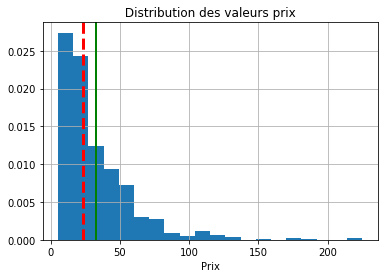

In [25]:
# Histogramme
data_complet["price"].hist(density=True,bins=20)
plt.axvline(data_complet["price"].mean(), color='g', linestyle='-', linewidth=2)
plt.axvline(data_complet["price"].median(), color='r', linestyle='--', linewidth=3)
plt.title(" Distribution des valeurs prix ")
plt.xlabel('Prix')
plt.show()

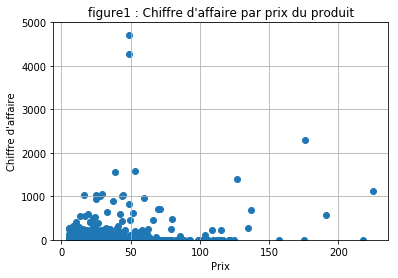

In [27]:
# Afficher un graphique du chiffre d'affaire en fonction du prix produit
plt.figure()
plt.scatter(data_complet['price'],data_complet['chiffre_affaire'])
plt.ylim(0, 5000)
plt.title("figure1 : Chiffre d'affaire par prix du produit")
plt.xlabel('Prix')
plt.ylabel("Chiffre d'affaire")
plt.grid()
plt.show()

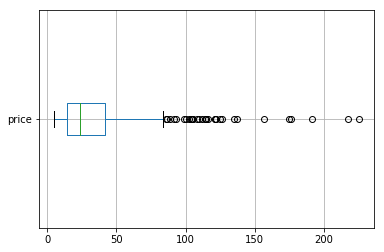

In [28]:
# Representation graphique en boxplot:
data_complet.boxplot(column="price", vert=False)
plt.show()

### On voit ici les Q1, Q3 et la médiane, les outliers au-dessus de Q3 et leur position en fonction de leur prix.

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


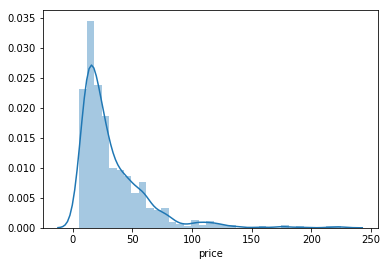

In [29]:
sns.distplot(data_complet['price'])

In [30]:
data = data_complet.price
print(f'moyenne : {data.mean()}')
print(f'médiane : {data.median()}')
print(f'mode : {data.mode()}')
# ddof = 0 sur la population complète
# ddof = 1 sur un échantillon de la population
print(f'variance : {data.var(ddof=0)}')
print(f'ecart type : {data.std(ddof=0)}')
print(f'skewness : {data.skew()}')
print(f'kurtosis : {data.kurtosis()}')
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
interquartile = q3-q1
print(f'intervale interquartile : {interquartile}')

moyenne : 32.49313725490197
médiane : 23.55
mode : 0    19.0
dtype: float64
variance : 772.3420677486691
ecart type : 27.791042941002935
skewness : 2.58090126300337
kurtosis : 10.088392064977288
intervale interquartile : 28.075000000000003


###  le mode et la variance empirique  sont réspectivement de 19 € et de 772 € 
### La mesure du Skewness de 2,6 est bien supérieure à zéro et nous indique que nos valeurs sont étalées vers la  droite, donc vers les prix les plus élevés. 
### le Kurtosis est de 10.

In [32]:
#  outliers minimum 

min_stat = q1 - (interquartile*1.5)
print("les outliers minimum  :", min_stat)

# outliers maximum 
max_stat = q3 + (interquartile*1.5)
print("les outliers maximum  :" ,max_stat)

# recherche des valeurs dont le prix est supérieur au maximum statistique
data_complet_sup = data_complet[data_complet['price'] > max_stat]
print("Le nombre de valeurs avec des prix supérieurs aux maximum :", data_complet_sup.shape[0])

les outliers minimum  : -28.012500000000003
les outliers maximum  : 84.28750000000001
Le nombre de valeurs avec des prix supérieurs aux maximum : 32


In [35]:
# liste outliers sup
data_complet_sup_1 = data_complet_sup[["product_id","product_name","price"]]
data_complet_sup_1.sort_values(by ='price')

,product_id,product_name,price
205,4359,champagne-larmandier-bernier-grand-cru-vieille...,85.6
438,5026,champagne-agrapart-fils-mineral-extra-brut-bla...,86.8
65,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4
502,5565,tempier-bandol-cabassaou-2017,92.0
602,5916,wemyss-malts-single-cask-chocolate-moka-cake,93.0
655,6214,domaine-des-comtes-lafon-volnay-1er-cru-champa...,99.0
63,4115,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,100.0
380,4903,domaine-des-croix-corton-grand-cru-les-greves-...,102.3
222,4407,cognac-frapin-cigar-blend,104.0
432,5008,domaine-des-comtes-lafon-volnay-1er-cru-santen...,105.0


### ces outliers sont des valeurs atypiques ,car c'est des valeurs qui "sortent du lot", mais pas forcément fausse.